## Indentification of all the members of the group.
Name:

Name:

Name: Yurick Yussuke Honda

## Name of the dataset
Dataset: Chicago Crime

## Abstract
Abstract of the dataset (describe the dataset with your own words): O dataset apresenta dados reais sobre os crimes reportados em Chicago. Ele oferece diversas informações sobre a localização onde o crime ocorreu e descrições da ocorrência. O tipo de crime é definido primariamente pelos identificadores Illinois Uniform Crime Reporting (IUCR) code e National Incident-Based Reporting System (NIBRS). O fato do dataset ser construído pelo Departamento de Polícia de Chicago, não garante a precisão dos dados. De qualquer forma, o objetivo do dataset é estudar potencias causas de crimes em Chicago, principalmente porque aproximadamente 10 pessoas, em média, são baleadas em Chicago por dia, de acordo com o próprio Departamento de Polícia de Chicago.

## Questions to the dataset
Question 1: Qual o percentual de crimes que resultaram em prisão?

Question 2: Em época de Natal a média de crimes reportados em Chicago é diferente do que em outras épocas do ano?

Question 3: Qual é o crime mais reportado?

Question 4: Qual o ano com maior número de crimes reportados?

Question 5: Os crimes que recebem atualização possuem alguma relação com o local do incidente?

Question 6: Os crimes com agressão doméstica possuem alguma relação com o local do incidente?

...

Question P:

## EDA
Present your EDA strategy: O foco é responder as perguntas trabalhadas por cada integrante da equipe. Quando integrantes analisam uma mesma pergunta, é possível comparar as respostas, com seus diversos pontos de vista, e o modo como a análise exploratória foi programada. Quando integrantes analisam perguntas diferentes, é possível obter cada vez mais informações sobre o dataset. A análise exploratória de dados será feita por meio da análise de dados estatísticos e geração de gráficos para auxiliar na visualização da informação. Todas as questões serão divididas pela resolução de cada integrante, quando mais de um integrante a resolveu, e então serão feitas as conclusões.

In [1]:
import pandas as pd
from statistics import mean, median
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

In [2]:
crimes = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

## Questão 1

### Resolução Yurick

A resolução consistiu em agrupar os valores da coluna 'Arrest' e contá-los. Depois disso, calcular o percentual de valores 'True', uma vez que esse campo assume apenas valores 'True'/'False'. Verificando que apenas uma pequena quantidade de ocorrências, pouco mais de um quarto do dataset, resultaram em apreensão de algum indivíduo. Por fim, para uma melhor visualização da dimensão da diferença entre os valores, foi plotado um gráfico de barra e outro de setores. A partir deles, a conclusão, dessa vez de forma visual, fica mais clara.

In [7]:
series_describe = crimes['Arrest'].value_counts()
# Calculate the FALSE values
false_values = series_describe.get(False)
# Calculate the TRUE values
true_values = series_describe.get(True)
# Calculate the percentage
100.0*true_values/(false_values+true_values)

25.91256760077819

<BarContainer object of 2 artists>

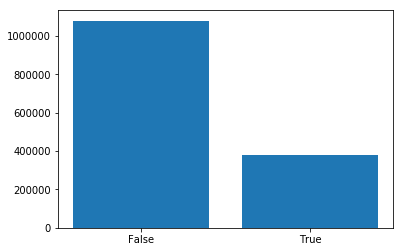

In [8]:
# Plot bar based on calc values
plt.bar(['False', 'True'], [false_values, true_values])

([<matplotlib.patches.Wedge at 0x7fb45e811b10>,
 [Text(-0.755202,0.799794,'False'), Text(0.755202,-0.799794,'True')])

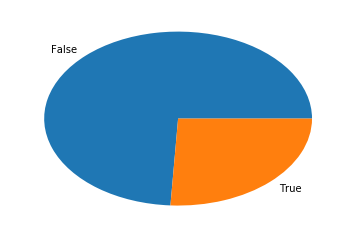

In [9]:
# Plot bar based on calc values
plt.pie([false_values, true_values], labels=['False', 'True'])

## Questão 2

### Resolução Yurick

O primeiro passo foi converter os valores do campo 'Date' para o time Datetime do Pandas. Depois disso, houve o cálculo da quantidade de ocorrências por mês, para qualquer ano. Essa primeira abordagem, considera que o período de Natal é o mês de dezembro. É possível verificar que no mês de dezembro não há aumento na quantidade de crimes, pelo contrário, possui até menor quantidade de ocorrências do que a média (121392.83333333333). Uma forma de visualizar isso é pelo gráfico de barras, onde é possível comparar melhor o mês de dezembro com os restantes. Além disso, outro recurso que facilita é o boxplot, em que é possível verificar que a quantidade de crimes do mês de dezembro se localiza entre o limite inferior e o primeiro quartil do boxplot.

Outra abordagem realizada é considerar que o período de Natal se situa entre os dias 23 e 31 do mês de dezembro, fazendo então a comparação com o mesmo período de outros meses. Nesse último caso, foi plotado um gráfico de setores, onde não é possível verificar nenhum aumento na quantidade de ocorrências no período de Natal.

In [14]:
crimes["Date"] = pd.to_datetime(crimes["Date"])
# Calculate the crimes occurred on each month
crimes_by_month = crimes["Date"].dt.month.value_counts()
print(crimes_by_month.mean())
# Sort the series
print(crimes_by_month.sort_index())

121392.83333333333
1     123809
2      98073
3     119010
4     118064
5     129735
6     130575
7     135762
8     133738
9     124067
10    123571
11    111834
12    108476
Name: Date, dtype: int64


<BarContainer object of 12 artists>

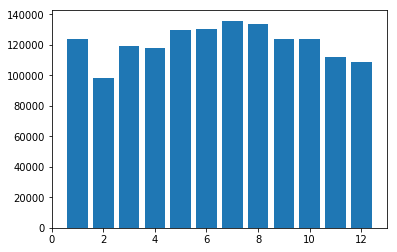

In [11]:
# Plot a bar with the number of crimes on each month
plt.bar(crimes_by_month.index, crimes_by_month.values)

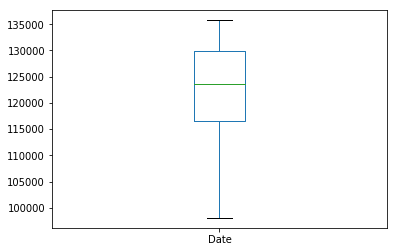

In [12]:
# Plot a boxplot with the number of crimes on each month
crimes_by_month.plot.box()

([<matplotlib.patches.Wedge at 0x7fb457ce0190>,
 [Text(-0.932509,0.583462,'Janeiro'),
  Text(-1.08011,0.20825,'Fevereiro'),
  Text(-1.06007,-0.293673,'Marco'),
  Text(-0.788481,-0.767006,'Abril'),
  Text(-0.266944,-1.06712,'Maio'),
  Text(0.36137,-1.03895,'Junho'),
  Text(0.884657,-0.653744,'Julho'),
  Text(1.0999,-0.014839,'Agosto'),
  Text(0.909201,0.619156,'Setembro'),
  Text(0.426777,1.01384,'Outubro'),
  Text(-0.159974,1.08831,'Novembro'),
  Text(-0.657171,0.882114,'Dezembro')],
 [Text(-0.508641,0.318252,'4.4%'),
  Text(-0.589149,0.113591,'7.3%'),
  Text(-0.578222,-0.160185,'7.4%'),
  Text(-0.430081,-0.418367,'8.6%'),
  Text(-0.145606,-0.582064,'9.0%'),
  Text(0.197111,-0.566699,'9.4%'),
  Text(0.48254,-0.356588,'9.7%'),
  Text(0.599945,-0.00809402,'10.2%'),
  Text(0.495928,0.337722,'9.3%'),
  Text(0.232787,0.553001,'9.0%'),
  Text(-0.0872587,0.593621,'8.3%'),
  Text(-0.358457,0.481153,'7.4%')])

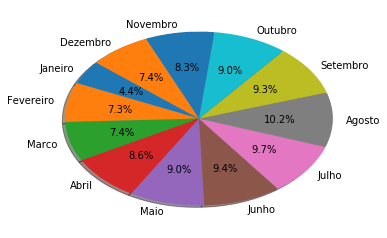

In [13]:
periods_by_month = []
# Calculate the crimes on the period month/23-month/31
crimes_period = crimes["Date"].dt.day.between(23, 31)
crimes_period = crimes_period.where(crimes_period == True).dropna()
for i in range(1, 13):
    crimes_month = crimes["Date"].dt.month.between(i-1, i)
    crimes_month = crimes_month.where(crimes_month == True).dropna()
    # Calculate the crimes on each month and make intersection with period
    periods_by_month.append(len(crimes_period.index.intersection(crimes_month.index)))
labels = ['Janeiro','Fevereiro','Marco','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
# Plot a pie with the number of crimes on each month in the given period
plt.pie(periods_by_month, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

## Questão 3

### Resolução Yurick

Apesar e parecer uma questão simples, para verificar os crimes mais reportados do dataset foram utilizadas duas abordagens: IUCR code e FBI code. O [Illinois Uniform Crime Reporting](https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e) (IUCR) code consiste em classificar um crime de acordo com os regimes do estado de Illinois. Para isso, encontrou-se uma base de dados, que está anexada, que relaciona os códigos IUCR a uma descrição mais clara. Com isso, foram calculados os dez códigos IUCR com maior quantidade de ocorrências que foram relacionados a sua descrição. Depois disso, foram plotados gráficos de setor e barra para melhor visualização. O código IUCR com maior quantidade de ocorrência é o de roubo de 500 ou menos dólares.

Na abordagem por [FBI code](http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html), não foi possível encontrar um arquivo csv com a relação dos códigos e uma descrição detalhada. Mas o cálculo seguiu da mesma forma, inicialmente a análise dos dez códigos FBI com maior quantidade de ocorrências, e então plotá-los em gráficos de barra e setores. O código mais reportado é 06, cujo significado é furto. O que confirma, de forma genérica, o código IUCR.

In [15]:
iucr = crimes.groupby('IUCR').size().sort_values().tail(10)
print(iucr)
reader = csv.reader(open('Chicago_Police_Department_-_Illinois_Uniform_Crime_Reporting__IUCR__Codes.csv', 'r'))
# convert iucr to description
d_iucr = {}
for row in reader:
   d_iucr[row[0]] = [row[1], row[2]]

IUCR
0910     51741
0610     53500
1811     60557
0560     61942
1310     71694
1320     72515
0810     74906
0460     88069
0486    130700
0820    136036
dtype: int64


In [16]:
# For each iucr show a better description
for val in iucr.index:
    desc = d_iucr[str(int(val))][0] + " - " + d_iucr[str(int(val))][1]
    print(val + ": " + desc)

0910: MOTOR VEHICLE THEFT - AUTOMOBILE
0610: BURGLARY - FORCIBLE ENTRY
1811: NARCOTICS - POSS: CANNABIS 30GMS OR LESS
0560: ASSAULT - SIMPLE
1310: CRIMINAL DAMAGE - TO PROPERTY
1320: CRIMINAL DAMAGE - TO VEHICLE
0810: THEFT - OVER $500
0460: BATTERY - SIMPLE
0486: BATTERY - DOMESTIC BATTERY SIMPLE
0820: THEFT - $500 AND UNDER


<BarContainer object of 10 artists>

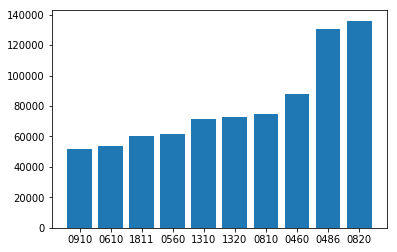

In [17]:
# plot bar with iucr
plt.bar(iucr.index, iucr.values)

([<matplotlib.patches.Wedge at 0x7fb4519205d0>,
 [Text(-0.967774,0.522889,'0910'),
  Text(-1.09622,0.0911309,'0610'),
  Text(-1.02792,-0.391649,'1811'),
  Text(-0.730854,-0.822102,'0560'),
  Text(-0.221777,-1.07741,'1310'),
  Text(0.389691,-1.02866,'1320'),
  Text(0.888216,-0.6489,'0810'),
  Text(1.09997,0.00850214,'0460'),
  Text(0.713459,0.837243,'0486'),
  Text(-0.366378,1.03719,'0820')],
 [Text(-0.527877,0.285212,'6.5%'),
  Text(-0.597937,0.0497078,'6.7%'),
  Text(-0.560681,-0.213627,'7.6%'),
  Text(-0.398648,-0.448419,'7.7%'),
  Text(-0.12097,-0.587679,'8.9%'),
  Text(0.212559,-0.561087,'9.0%'),
  Text(0.484482,-0.353946,'9.3%'),
  Text(0.599982,0.00463753,'11.0%'),
  Text(0.389159,0.456678,'16.3%'),
  Text(-0.199843,0.565741,'17.0%')])

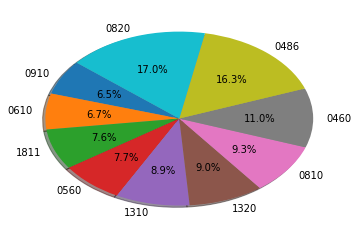

In [18]:
# Plot pie with iucr
plt.pie(iucr, labels=iucr.index, autopct='%1.1f%%', shadow=True, startangle=140)

In [19]:
# group by fbi code
fbi_code = crimes.groupby('FBI Code').size().sort_values().tail(10)
print(fbi_code)

FBI Code
03      57313
07      61138
11      66547
08A     68076
05      83397
18     129796
26     137597
14     155455
08B    227082
06     329460
dtype: int64


([<matplotlib.patches.Wedge at 0x7fb44f9b36d0>,
 [Text(-0.931221,0.585514,'03'),
  Text(-1.05762,0.302404,'07'),
  Text(-1.09962,-0.0289782,'11'),
  Text(-1.03415,-0.374869,'08A'),
  Text(-0.834631,-0.716513,'05'),
  Text(-0.379673,-1.0324,'18'),
  Text(0.310317,-1.05532,'26'),
  Text(0.916991,-0.607558,'14'),
  Text(1.0413,0.35452,'08B'),
  Text(-0.0945769,1.09593,'06')],
 [Text(-0.507939,0.319371,'4.4%'),
  Text(-0.576882,0.164947,'4.6%'),
  Text(-0.599792,-0.0158063,'5.1%'),
  Text(-0.564084,-0.204474,'5.2%'),
  Text(-0.455253,-0.390825,'6.3%'),
  Text(-0.207095,-0.563127,'9.9%'),
  Text(0.169264,-0.57563,'10.5%'),
  Text(0.500177,-0.331395,'11.8%'),
  Text(0.567984,0.193374,'17.3%'),
  Text(-0.0515874,0.597778,'25.0%')])

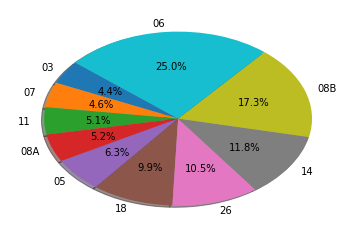

In [20]:
# plot pie with fbi
plt.pie(fbi_code, labels=fbi_code.index, autopct='%1.1f%%', shadow=True, startangle=140)

## Questão 4

### Resolução Yurick

Para verificar o ano com maior quantidade de ocorrências no dataset, foram calculadas as quantidades de ocorrências em cada ano. Depois disso, foram geradas informações estatísticas e plotados gráficos de barra e setores, além de um boxplot. Uma observação extra é a pequena quantidade de ocorrências no ano de 2017, em que aparenta haver uma falta de dados desse ano. O ano com mais crimes reportados é 2012, representando 23% (335670), mas não muito longe da média (242785.666667), mesmo com o ano de 2012 alterando o valor da média para menor do que o esperado.

In [21]:
# Count the number of incidents on each year
crimes_by_year = crimes["Year"].value_counts()
print(crimes_by_year)

2012    335670
2013    306703
2014    274527
2016    265462
2015    262995
2017     11357
Name: Year, dtype: int64


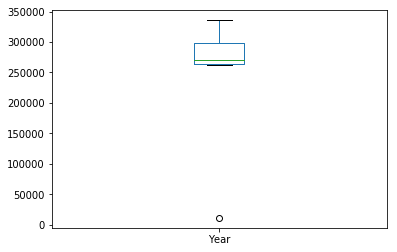

In [22]:
# Plot boxplot with year
crimes_by_year.plot.box()

In [23]:
# show statistics data for year field
crimes_by_year.describe()

count         6.000000
mean     242785.666667
std      116792.378282
min       11357.000000
25%      263611.750000
50%      269994.500000
75%      298659.000000
max      335670.000000
Name: Year, dtype: float64

<BarContainer object of 6 artists>

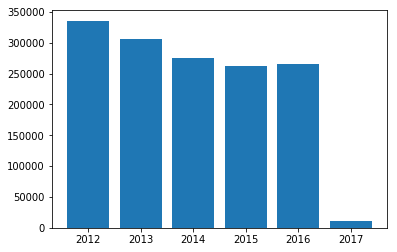

In [24]:
# Plot bar with year
plt.bar(crimes_by_year.index, crimes_by_year.values)

([<matplotlib.patches.Wedge at 0x7fb44e7ad3d0>,
 [Text(-1.09963,-0.0283595,'2012'),
  Text(-0.174871,-1.08601,'2013'),
  Text(0.977239,-0.504979,'2014'),
  Text(0.850044,0.698158,'2016'),
  Text(-0.279062,1.06401,'2015'),
  Text(-0.82508,0.727491,'2017')],
 [Text(-0.599801,-0.0154688,'23.0%'),
  Text(-0.0953844,-0.59237,'21.1%'),
  Text(0.53304,-0.275443,'18.8%'),
  Text(0.46366,0.380814,'18.2%'),
  Text(-0.152216,0.580371,'18.1%'),
  Text(-0.450044,0.396813,'0.8%')])

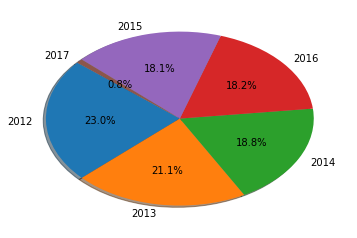

In [25]:
# Plot pie with year
plt.pie(crimes_by_year, labels=crimes_by_year.index, autopct='%1.1f%%', shadow=True, startangle=140)

## Questão 5

### Resolução Yurick

Como a descrição do dataset menciona, os dados do dataset podem não ter muita confiabilidade. Para responder essa questão, era preciso analisar o campo 'Updated On', porém percebeu-se que ele não possui tanta representatividade. Isso quer dizer que todas as linhas da tabela foram atualizadas em algum momento, e uma atualização em um registro não necessariamente representa que a ocorrência sofreu uma atualização. Por conta disso, o gráfico dos locais de ocorrência de crimes que não tiveram atualização está vazio.

Assim, o foco da pergunta foi alterado para descobrir quais as datas que ofertaram maior quantidade de atualizações. O gráfico de barras plotado mostra as datas com maior número de atualizações. Nos dias 04/02/2016 e 17/08/2015 diversos dados tiveram atualização, o que pode indicar algum acerto geral nos dados do dataset. Portanto, os dados perdem sua confiança para análise com respeito a sua data de atualização.

<BarContainer object of 0 artists>

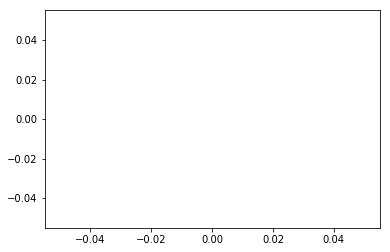

In [26]:
crimes["Updated On"] = pd.to_datetime(crimes["Updated On"])
# check the crimes that were updated
crimes["Not_updated"] = np.where((crimes['Date']==crimes['Updated On']),True, False)
crimes_local_updated = {}
# for updated crimes get its community area
for index, crime in crimes.iterrows():
    if crime["Not_updated"]:
        if crime["Community Area"] not in crimes_local_updated:
            crimes_local_updated[crime["Community Area"]] = 0
        else:
            crimes_local_updated[crime["Community Area"]] += 1
# plot bar with community area
plt.bar(crimes_local_updated.keys(), crimes_local_updated.values())

In [27]:
# get the date when data were updated
most_updated = crimes["Updated On"].dt.date.value_counts().sort_values().tail(10)
print(most_updated)

2016-01-15      3630
2015-09-30      4432
2015-09-24      4982
2015-09-17      5046
2015-08-31      5285
2015-10-09      6468
2015-09-10      6847
2016-04-15      8471
2015-08-17    158320
2016-02-04    909108
Name: Updated On, dtype: int64


<BarContainer object of 10 artists>

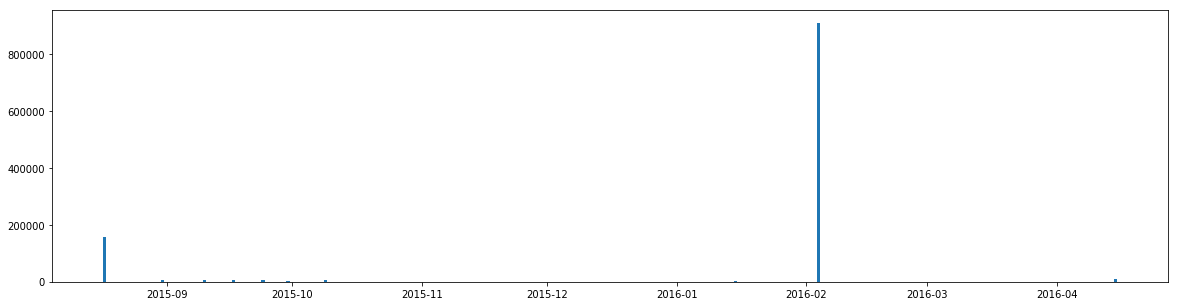

In [28]:
# plot bar with date
f, ax = plt.subplots(figsize=(20,5))
plt.bar(most_updated.index, most_updated.values)

## Questão 6

### Resolução Yurick

Para responder a essa questão, foram calculados a quantidade de ocorrência envolvendo agressão doméstica pelos locais de Chicago divididos por '[Community Area](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6)'. Depois disso, foram plotados os dez locais com maior quantidade de ocorrência envolvendo agrssão doméstica, utilizando gráficos de setor e barra. Depois disso, foram geradas informações estatísticas e plotado um boxplot de todos as Community Areas com ocorrência de crimes envolvendo agressão doméstica. Novamente não foi possível localizar um arquivo csv com o Chicago Community Area. O local com maior quantidade de violência doméstica é a Community Area 25, ou seja, Austin, com 17839 ocorrências. Austin difere muito de Edison Park (Community Area 9), o local com menor incidência de agressão doméstica. Isso também pode ser visto no boxplot, onde Austin é um outlier bem distante do limite superior.

In [29]:
crimes_local_domestic = {}
# for domestic violence crimes get its community area
for index, crime in crimes.iterrows():
    if crime["Domestic"] and not math.isnan(crime["Community Area"]):
        if crime["Community Area"] not in crimes_local_domestic:
            crimes_local_domestic[int(crime["Community Area"])] = 0
        else:
            crimes_local_domestic[int(crime["Community Area"])] += 1

In [30]:
# convert dict to series
crimes_local_domestic_series = pd.Series(crimes_local_domestic).sort_values()
print(crimes_local_domestic_series)

9       221
12      250
47      388
76      435
13      435
5       499
74      551
34      555
18      564
57      574
55      596
72      607
62      654
37      712
33      758
59      761
36      768
10      810
7       840
11      858
41      875
4       952
64      958
50      997
56     1154
52     1240
32     1247
60     1283
45     1321
39     1324
      ...  
8      2239
58     2332
2      2409
15     2592
1      2978
73     3033
40     3170
22     3194
24     3207
38     3435
28     4007
30     4111
42     4147
19     4419
61     4616
53     4764
26     4860
27     5027
46     5732
66     6228
44     6335
49     6941
23     7625
69     7869
68     7936
67     8260
71     8913
29     8924
43    10674
25    17839
Length: 77, dtype: int64


<BarContainer object of 10 artists>

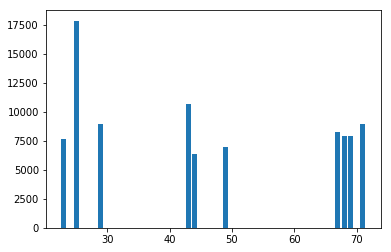

In [31]:
# plot bar with community area
plt.bar(crimes_local_domestic_series.tail(10).index, crimes_local_domestic_series.tail(10).values)

([<matplotlib.patches.Wedge at 0x7fb450dfb990>,
 [Text(-0.9756,0.508138,'44'),
  Text(-1.0997,0.0257861,'49'),
  Text(-0.976871,-0.50569,'23'),
  Text(-0.58437,-0.93194,'69'),
  Text(-0.017954,-1.09985,'68'),
  Text(0.566377,-0.942983,'67'),
  Text(0.995645,-0.467645,'71'),
  Text(1.08329,0.19103,'29'),
  Text(0.726982,0.825528,'43'),
  Text(-0.281662,1.06333,'25')],
 [Text(-0.532146,0.277166,'6.9%'),
  Text(-0.599835,0.0140652,'7.6%'),
  Text(-0.532839,-0.275831,'8.4%'),
  Text(-0.318747,-0.508331,'8.6%'),
  Text(-0.00979308,-0.59992,'8.7%'),
  Text(0.308933,-0.514354,'9.0%'),
  Text(0.543079,-0.255079,'9.8%'),
  Text(0.590883,0.104198,'9.8%'),
  Text(0.396536,0.450288,'11.7%'),
  Text(-0.153634,0.579997,'19.5%')])

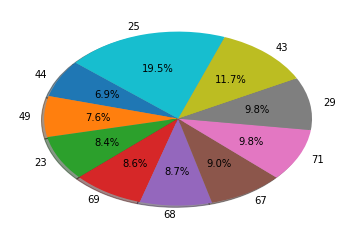

In [32]:
# plot pie with community area
plt.pie(crimes_local_domestic_series.tail(10), labels=crimes_local_domestic_series.tail(10).index, autopct='%1.1f%%', shadow=True, startangle=140)

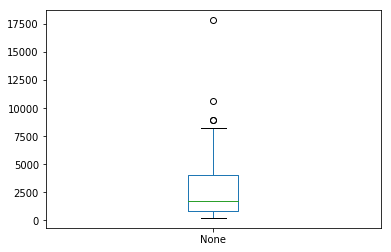

In [33]:
# plot boxplot with community area
crimes_local_domestic_series.plot.box()

In [34]:
# get statistics info about domestic violence
crimes_local_domestic_series.describe()

count       77.000000
mean      2856.818182
std       3015.459722
min        221.000000
25%        858.000000
50%       1754.000000
75%       4007.000000
max      17839.000000
dtype: float64

## Some examples of analysis/visualizations:

1) Present the mean, variance, min, median and max values for each attribute. If the dataset has too many attibutes, choose the more significant ones. Present your code and some remarks to help the understanding.

2) How well distributed are the dataset in relation the each attribute. How can you visually check that? Hint: plot a histogram

3) Is there any attribute that can be used to better interpret the dataset? Show this in a graphic where you used this attribute to group (groupby) the data.

4) Is there any outlier's pattern? 

5) Make your own remarks about the dataset. Try to use one or more graphics to justify your remarks.

6) Is there any symmetry that can be stressed?

7) How important was EDA to help you understand the dataset?